Image name 2.jpg
Image path /notebooks/CNNcatdogs/imagenes/test
File name /notebooks/CNNcatdogs/imagenes/test/2.jpg
Status: The images is valid


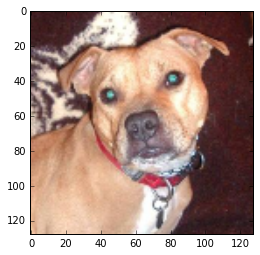

In [8]:
import tensorflow as tf
import numpy as np
import os,glob,cv2
import sys,argparse
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# First, pass the path of the image
rutaDeDatosDeEntrenamiento=os.path.join(os.path.realpath('.'),'imagenes/test')
imageName = "2.jpg"
filename = rutaDeDatosDeEntrenamiento +'/' +imageName
image_size=128
num_channels=3
images = []
print("Image name "+str(imageName))
print("Image path "+str(rutaDeDatosDeEntrenamiento))
print("File name "+str(filename))

# Reading the image using OpenCV
image = cv2.imread(filename)
if image is not None:
    print("Status: The images is valid")
    image = cv2.resize(image, (image_size, image_size),1,1, cv2.INTER_LINEAR)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    images.append(image)
    images = np.array(images, dtype=np.uint8)
    images = images.astype('float64')
    images = np.multiply(images, 1.0/255.0) 

    #The input to the network is of shape [None image_size image_size num_channels]. Hence we reshape.
    x_batch = images.reshape(1, image_size,image_size,num_channels)
    plt.imshow(images[0])
    plt.show()

In [9]:
    ## Let us restore the saved model 
    sess = tf.Session()
    # Step-1: Recreate the network graph. At this step only graph is created.
    saver = tf.train.import_meta_graph('./model/codigoModificado/dogs-cats-model_20_04_2018_v.1.meta.meta')
    # Step-2: Now let's load the weights saved using the restore method.
    saver.restore(sess, tf.train.latest_checkpoint('./model/codigoModificado'))

    # Accessing the default graph which we have restored
    graph = tf.get_default_graph()

    # Now, let's get hold of the op that we can be processed to get the output.
    # In the original network y_pred is the tensor that is the prediction of the network
    prediccionDeProbabilidadPorClase = graph.get_tensor_by_name("prediccionDeProbabilidadPorClase:0")
    
    ## Let's feed the images to the input placeholders
    tensorDeEntrada = graph.get_tensor_by_name("tensorDeEntrada:0") 
    tensorDeClases = graph.get_tensor_by_name("tensorDeClases:0") 
    y_test_images = np.zeros((1, 2)) 

    
    ### Creating the feed_dict that is required to be fed to calculate y_pred 
    feed_dict_testing = {tensorDeEntrada: x_batch, tensorDeClases: y_test_images}
    result=sess.run(prediccionDeProbabilidadPorClase, feed_dict=feed_dict_testing)
    # result is of this format [probabiliy_of_rose probability_of_sunflower]
    print("results"+str(result))
    
    results = result[0]
    if(results[0]>results[1]):
        print("Es un perro")
    else:
        print("Es un gato")


results[[0.56592166 0.43407828]]
Es un perro
